#**Titanic Challenge on Kaggle. Machine Learning from Disaster.**
##Первые шаги в анализе данных и машинном обучении.

---


Меня зовут Золотов Роман, я студент 2-го курса СПбГЭТУ "ЛЭТИ" на момент 2025 года. Данной статьей я хочу войти в мир Машинного Обучения и решить первую, основополагающую задачу на сайте Kaggle, а так-же помочь тем, кто собирается заняться тем же.


---

<a href="https://www.kaggle.com/c/titanic/"> Titanic challenge</a> - Задача с платформы Kaggle. Суть задачи в предугадывании результата с лучшей точностью. Результат в данном случае - это состояние "жизни" пассажира: выжил ли он после крушения или нет.

Предугадывание основывается на анализе данных о других пассажирах. Данные будут состоять из возраста, пола, имени и т.д.

---


План действий таков:

>1.   Подключение нужных библиотек
>2.   Загрузка данных
>3.   Первичный анализ
>4.   Выбор признаков
>5.   Обучение модели
>6.   Валидация модели (Примерная точность)

В ноутбуке используется только один язык программирования - Python.

---

##**Подключение библиотек**

---

Основные библиотеки, участвующие во всем процессе обучения:
>* **Pandas** для работы с данными в табличной форме
>
>* **Matplotlib** и **seaborn** для визуализации данных
>
>* **Numpy** для работы с линейной алгеброй (вычисление многомерных массивов)
>
>* **sklearn** для Машинного Обучения и Прогнозирования

In [55]:
import warnings #Игнорируем предупреждения, чтоб код воспринимался приятнее
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd # Импорт библиотеки Pandas

from matplotlib import pyplot as plt # Импорт библиотеки matplotlib
import numpy as np # Импорт библиотеки numpy

import seaborn as sns # Импорт библиотеки seaborn

import pylab as plot # Импорт библиотеки pylab для настройки стилей графиков

params = { # Параметры для графиков
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]

}
plot.rcParams.update(params)

---

##**Загрузка данных**

---


В этом пункте импортируем входные данные: два .csv файла.

**train.csv** и **test.csv** - Датасеты

Dataset - уже обработанная структурированная информация, чаще представленная в виде таблиц.

>Оба файла являются CSV, представлениями табличных данных

>Содержат информацию об:
* PassengerID: ID Пассажира
* Pclass: Класс на борту (Первый, второй или третий класс)
* Name: Имя
* Sex: Пол
* Age: Возраст
* SibSp: Количество Братьев/Сестер/Супруг на борту
* Parch: Количество Родителей/Детей на борту
* Ticket: Номер Билета
* Fare: Стомость билета
* Cabin: Номер каюты
* Embarked: Три возможных Порта отправления (S - Southampton, C - Cherbourg, Q - Queenstown)

В **train.csv** информация об 891 (от 1-го PassengerID до 891-го PassengerID) пассажире. В **test.csv** 418 (от 892-го PassengerID до 1309-го PassengerID) пассажиров.

>Единственное различие между файлами заключается в том, что в **train.csv**, в отличии от **test.csv**, обозначен еще один столбик - Survived: Информация о том, выжил ли пассажир при крушении (0 - если нет, 1 - если да).

Наша задача: Для пассажиров из файла **test.csv** предугадать, выжили бы они или нет при крушении корабля.

***
Начинаем подключать первый Датасет.

In [56]:
data = pd.read_csv('train.csv') # В объект data помещается таблица train.csv

print(data.shape) # Количество строк и столбцов в data

(891, 12)


891 - Количество пассажиров.

12 - Количество столбцов с информацией о пассажире (от PassengerID до Embarked, включая столбец Survived).





In [57]:
data.head(7) # Предварительный просмотр данных из таблицы о первых 7-ми пассажирах (число 7 выбрано случайно, не несет никакой информации)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


---

## **Первичный анализ**

---

Если быстрым взглядом осмотреть таблицу, то можно увидеть NaN в Age и Cabin. Это значит, что данная информация о пользователе отсутствует.

Для быстрого просмотра статистики по числовым столбцам можно использовать метод describe().  

>В методе describe() выводится:
* count: Количество заполненых ячеек (Не Nan)
* mean: Среднее значение
* std: Стандартное отклонение
* min: Минимальное значение
* 25%: 25% данных меньше или равно этому значению
* 50%: Медиана (середина данных)
* 75%: 75% данных меньше или равно этому значению
* max: Максимальное значение

In [58]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Примерно 20% от возрастов пассажиров и правда было потярено.

Для того, чтобы восстановить потерянную информацию о возрасте, можно обратить внимание на **Титулы** возле имени у каждого из пассажиров! (Mr, Mrs, Miss..). Пассажирам, чей возраст был утерян, можно присвоить медианное значение возраста для их титула.

Сначала хочу выделить титулы пассажиров в отдельный столбец

In [59]:
# Извлекаем титул с помощью регулярного выражения
data['Title'] = data['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)

# Посмотрим, какие титулы получились
print(data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64


Для наглядности можем посмотреть на зависимости возраста от титула на графике

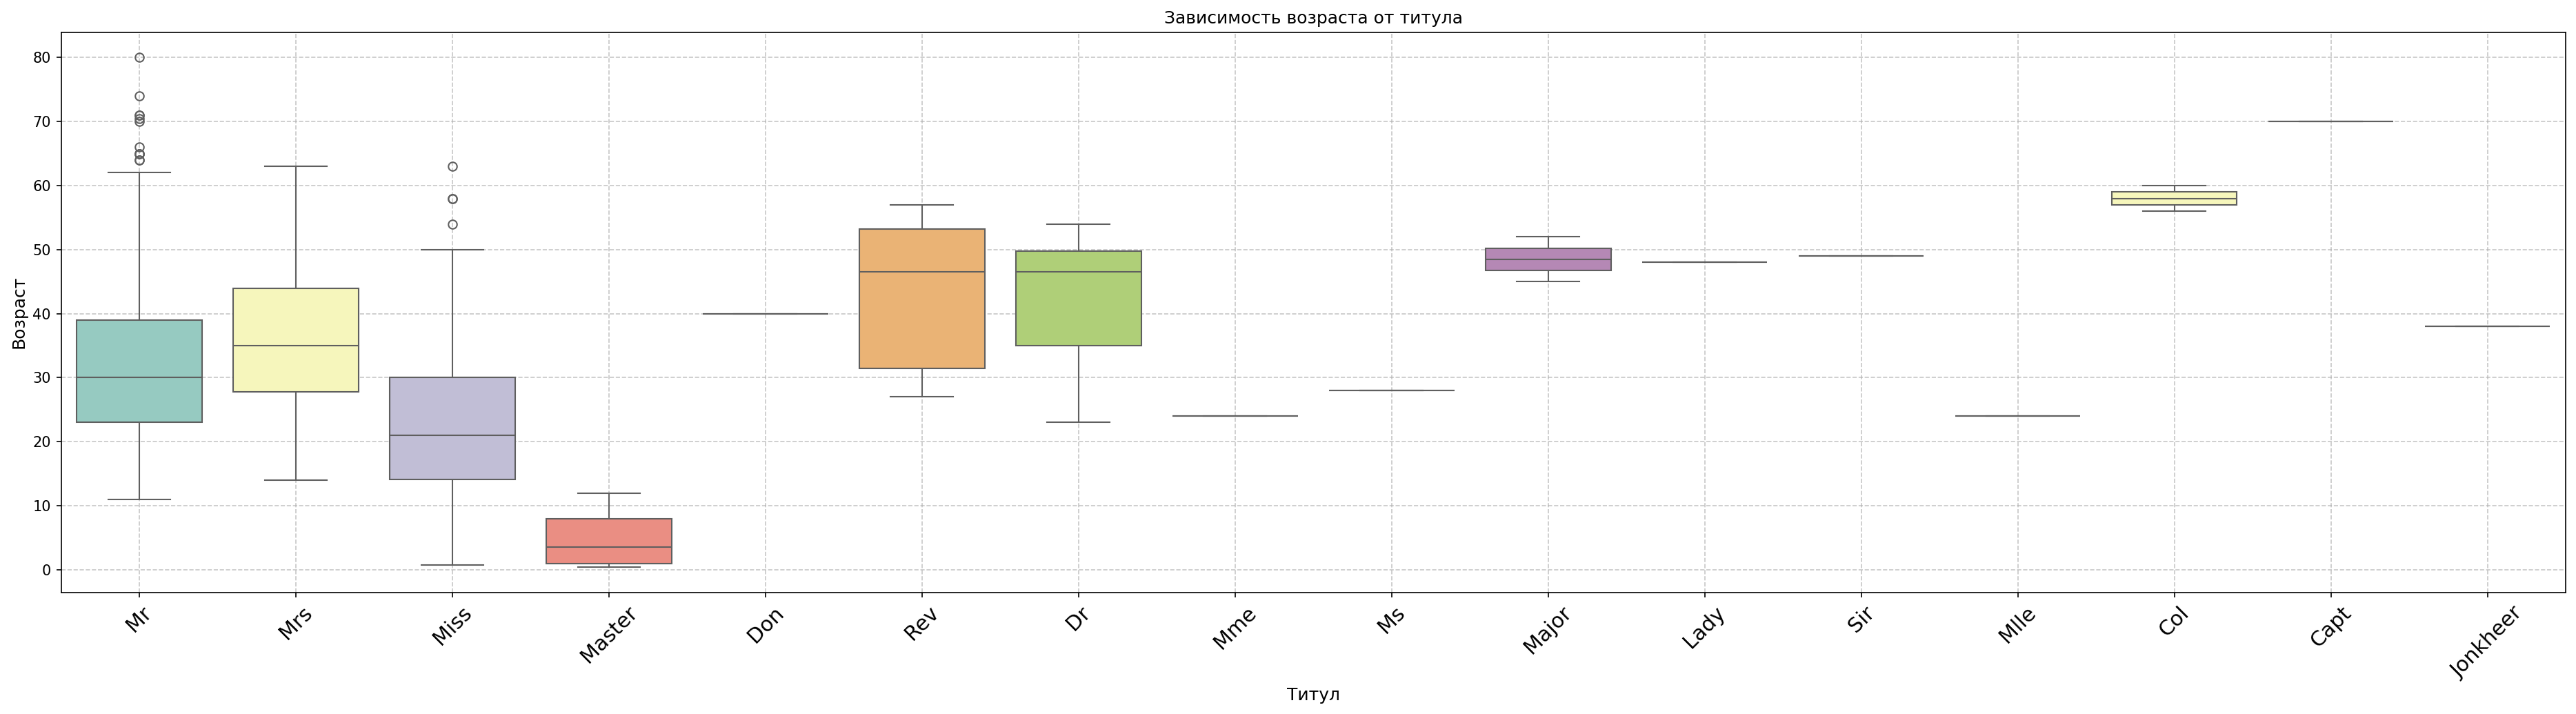

In [60]:
sns.boxplot(x='Title',
            y='Age',
            data=data.dropna(subset=['Age']),
            palette='Set3')

plt.title('Зависимость возраста от титула')
plt.xlabel('Титул')
plt.ylabel('Возраст')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
title_age_median = data.groupby('Title')['Age'].median() # Для каждого титула ищем медианное значение возраста

def fill_age(line): # Функция для заполнения NaN медианой по титулу
    if pd.isna(line['Age']): # Если ячейка с возрастом у строки пустая, то..
        return title_age_median[line['Title']] # Возвращаем в ячейку медианное значение возраста для титула у пассажира
    else:
        return line['Age'] # Иначе возвращаем эту же ячейку

# Применяем функцию к столбцу Age
data['Age'] = data.apply(fill_age, axis=1)

Пропущенные значения возрастов были восполнены медианным значением титула пассажира!

Затронем пропущенные значения в столбце Cabin. Можем использовать методы isna() для проверки каждой ячейки на NaN и sum() для подсчета подходящих (пустых) ячеек.

In [62]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Мы так-же видим, что в столбце Cabin с каютами пассажиров пропущено 687 из 891 значения. Из-за того, что около 80% данных потеряны, возможно, придется отказаться от наличия этого столбца при обучении модели.

Можно заметить 2 пустые ячейки в строке Embarked (неизвестно с какого порта садились эти двое пассажиров).

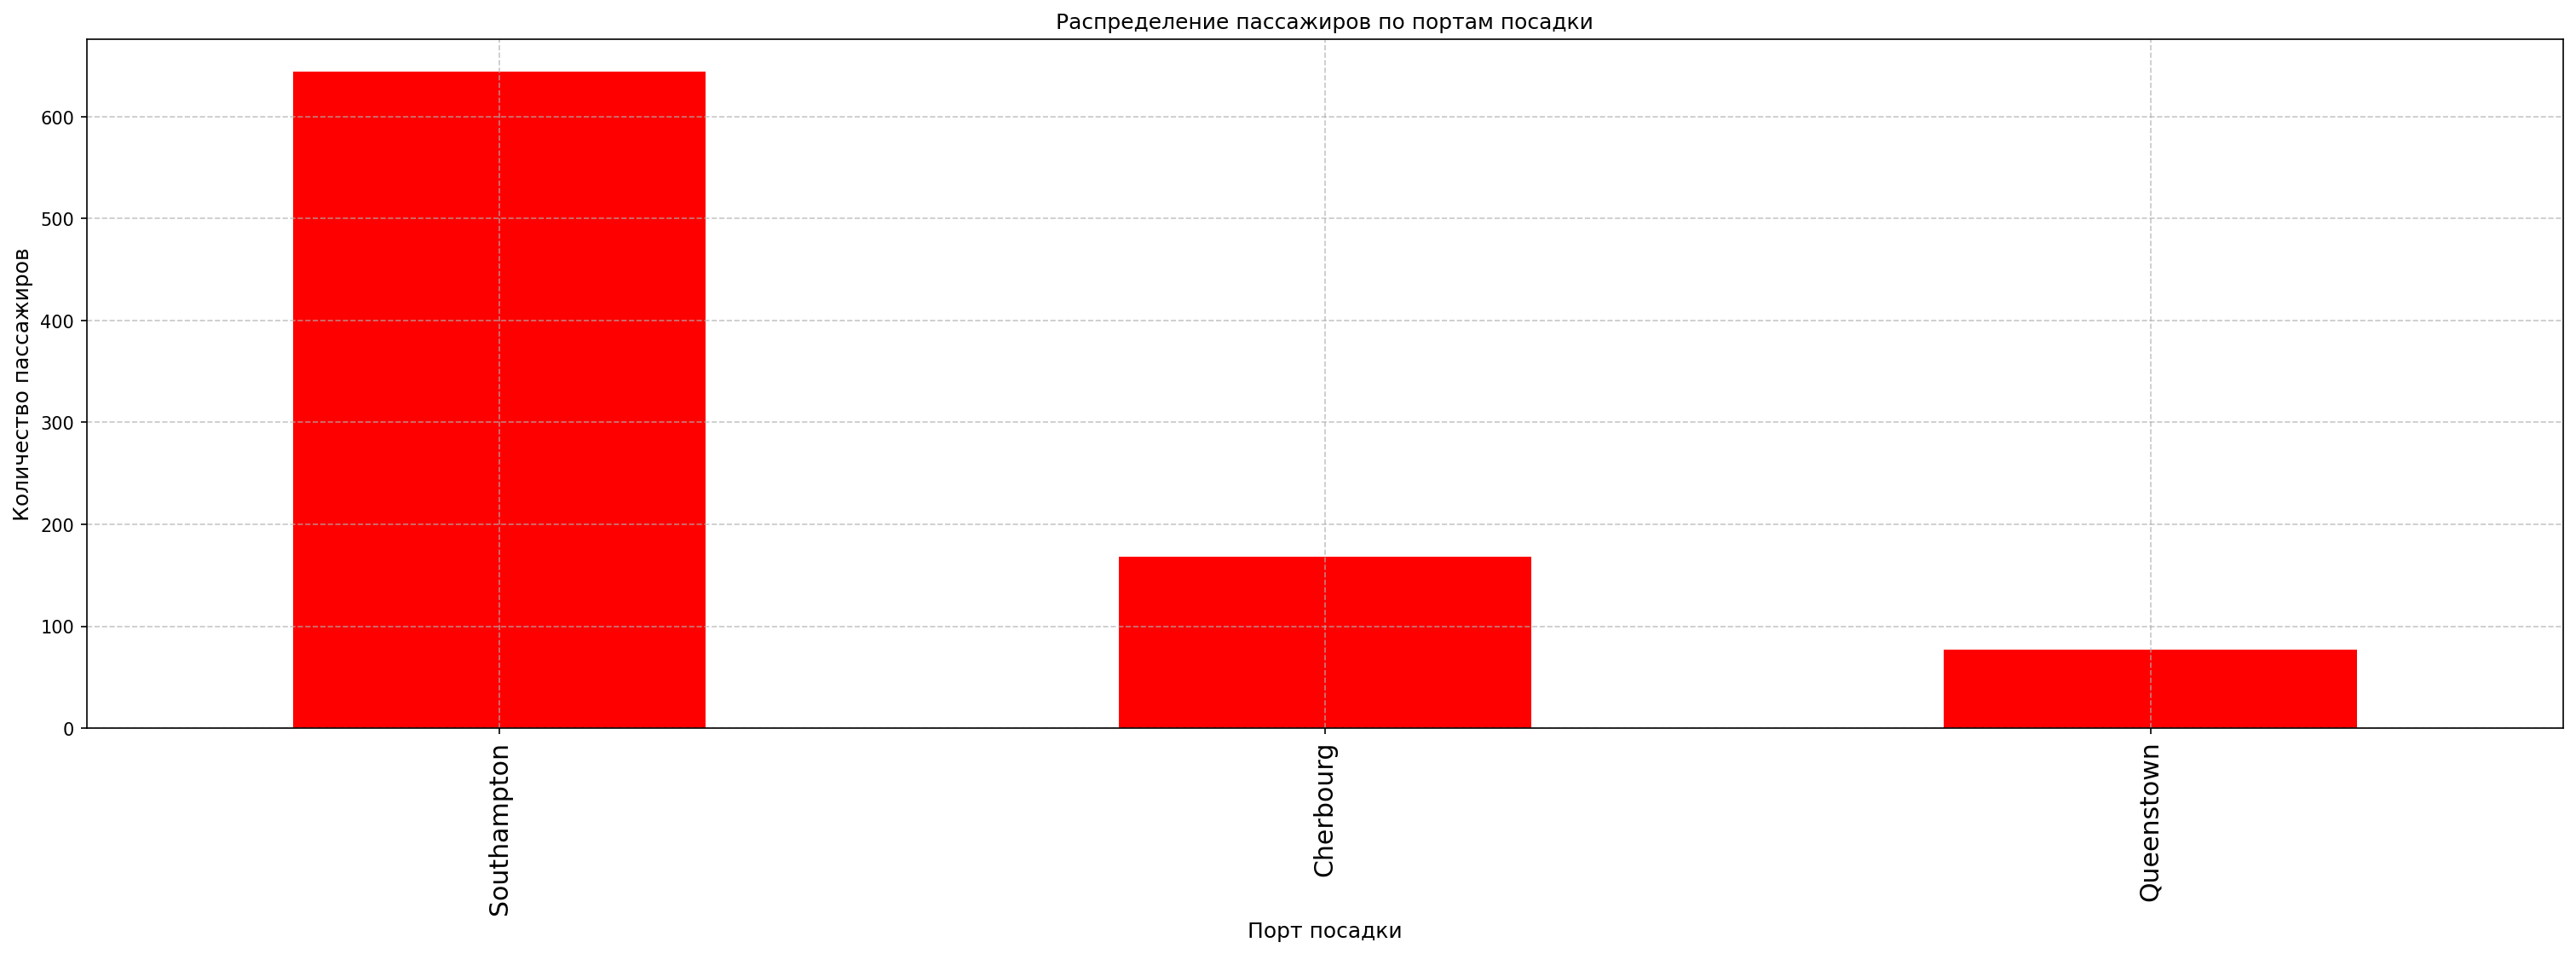

In [63]:
data['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}).value_counts().plot(kind='bar', color='red')
# Метод value_counts() считает сколько раз встречается S, C, Q соответственно. Метод plot() строит столбчатую диаграмму (bar plot) на основе полученных значений
plt.title('Распределение пассажиров по портам посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Из гистограммы видно, что посадки в Southampton'е сильно преобладают по количеству над количеством посадок в остальных портах. Для двух неизвестных ячеек посадки присвоим наиболее вероятный случай посадки - Порт S.

In [64]:
for i, emb in enumerate(data['Embarked']): # Метод enumerate позволяет переменной i присваивать индекс объекта строки, а в emb - сам объект.
# В данном случае emb - это значение ячейки в столбце Embarked
    if pd.isna(emb): data['Embarked'][i] = 'S' # Если emb является NaN, то этой ячейке присваивается порт S

In [65]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Видим, что пустых ячеек в столбце Embarked больше нет.

---

##**Выбор признаков**

---

###**Пол пассажира**

Первым делом хочется рассмотреть варианты, которые, вероятнее всего, максимально будут влиять на выжимаемость - это Пол, Статус, Возраст и Класс пассажира. Начнем по порядку.

Построим диаграмму.

In [66]:
# Метод crosstab строит новую таблицу, основываясь на "пересечениях" столбцов
# В данном случае строим таблицу из четырех элементов: сколько женщин погибло/выжило, сколько мужчин погибло/выжило
survival_by_sex = pd.crosstab(data['Sex'], data['Survived'])

survival_by_sex.head()

Survived,0,1
Sex,,
female,81,233
male,468,109


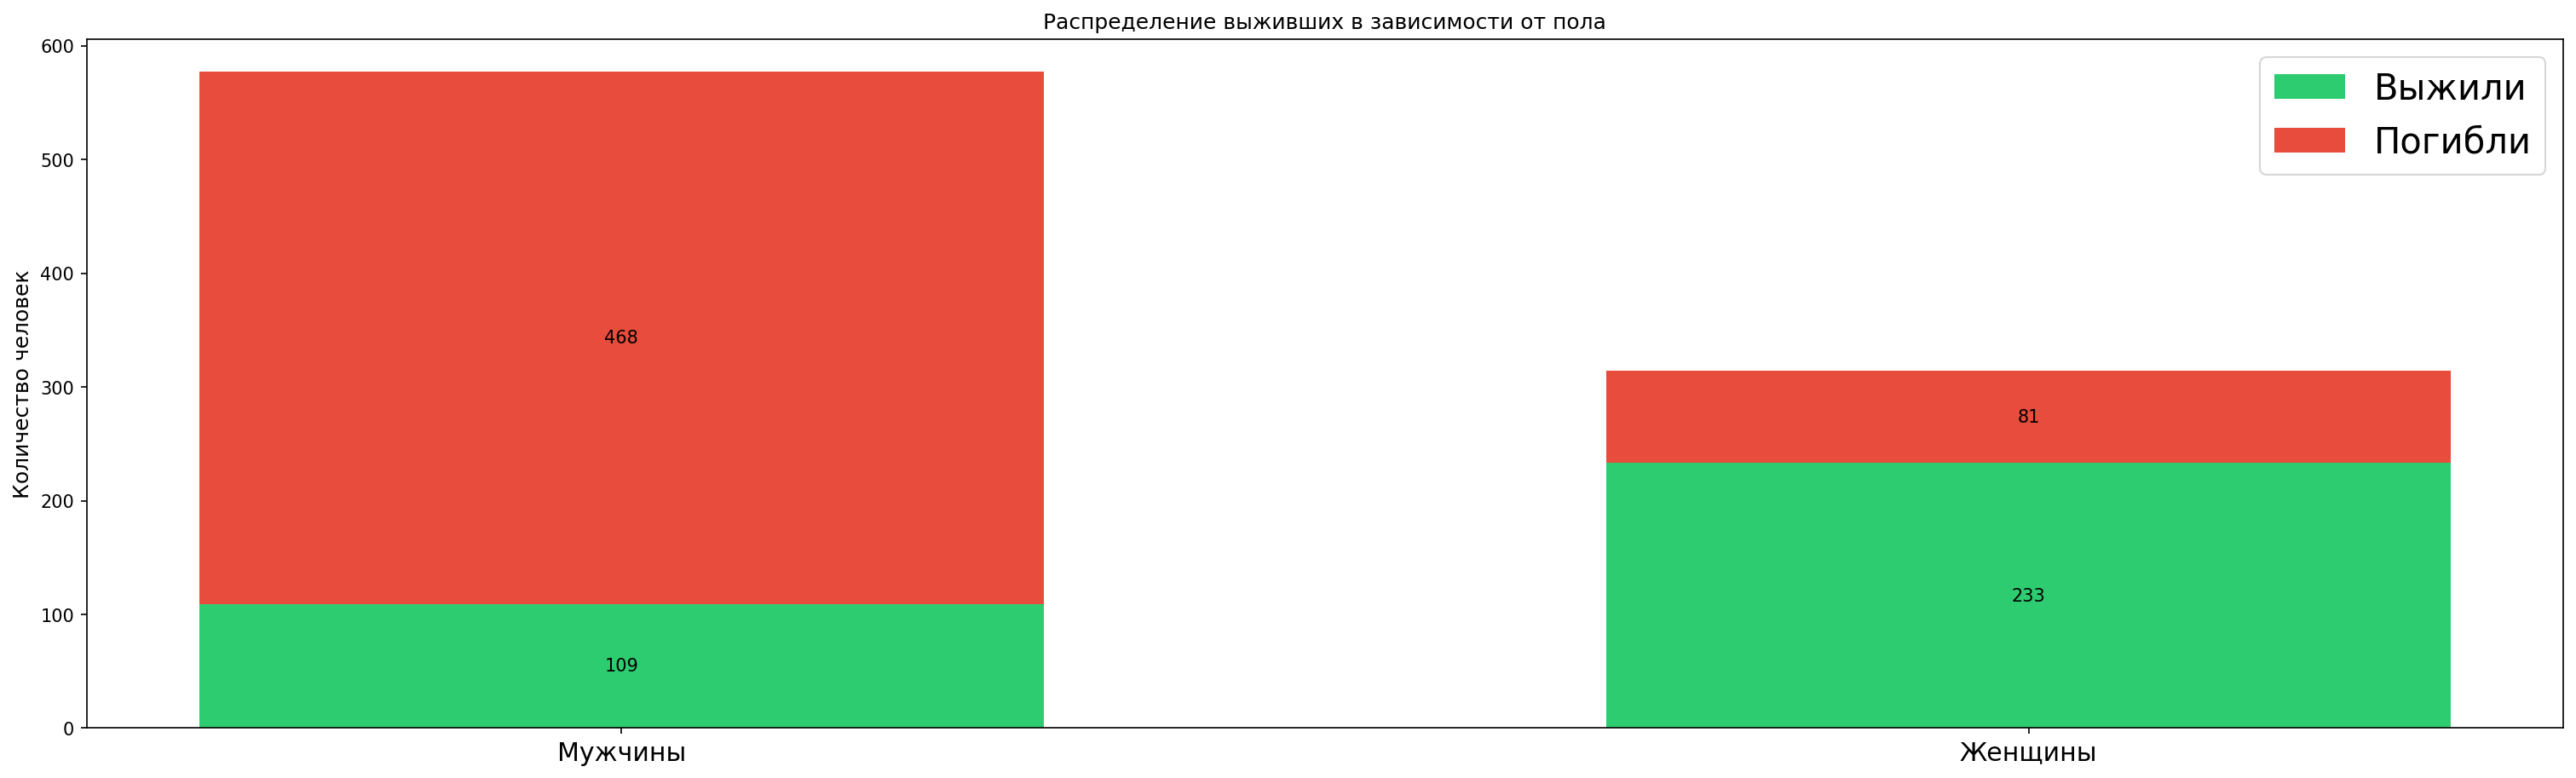

In [67]:
males_total = survival_by_sex.loc['male'].sum() # Сколько всего мужчин
females_total = survival_by_sex.loc['female'].sum() # Сколько всего женщин

males_survived = survival_by_sex.loc['male', 1] # Сколько мужчин выжило
females_survived = survival_by_sex.loc['female', 1] # Сколько женщин выжило

# Создаем словарь для построения столбчатого графика
survivors_counts = {
    'Выжили': [males_survived, females_survived], # Выжили: [109, 233]
    'Погибли': [survival_by_sex.loc['male', 0], survival_by_sex.loc['female', 0]] # Погибли: [468, 81]
}


fig, xy = plt.subplots() # Создает "картину" fig и график xy
bottom = np.zeros(2) # Массив нулей для построения "стопочных" столбцов (со слоями "выжили" и "погибли")

colors = ['#2ecc71', '#e74c3c'] # Зеленый - выжили, Красный - Погибли
for i, (key, count) in enumerate(survivors_counts.items()): # Проходимся по словарю, сначала выжившие, потом погибшие
    p = xy.bar(('Мужчины', 'Женщины'), # Метод bar создает две столбчатые диаграммы "Мужчины" и "Женщины"
               count, # Высота столбцов
               width=0.6, # Ширина столбцов
               label=key, # Подпись для легенды "Выжили" или "Погибли"
               bottom=bottom, # Высота для текущего слоя
               color=colors[i]) # Цвет столбцов
    bottom += count # Следующий столбец начнется с конца предыдущего (Первые два столбца высотой от 0 до 109 и 233, вторые два столбца высотой от 109 и 233 до 468 и 81)
    xy.bar_label(p, label_type='center') # Добавляет числа в центр столбца


xy.set_title('Распределение выживших в зависимости от пола') # Устанавливаем имя графика
xy.set_ylabel('Количество человек') # Подписываем ось У
xy.legend() # Отображаем на графике легенду "Выжили/Погибли"
plt.show() # Отображаем на экране получившийся график

В процентном соотношении:

In [68]:
print(f'''Выжило мужчин: {round(males_survived*100/males_total, 2)}%
Выжило женщин: {round(females_survived*100/females_total, 2)}%
''')

Выжило мужчин: 18.89%
Выжило женщин: 74.2%



Основываясь на выживаемость по признаку "Пол" пассажира, можно сделать временный вывод, что женщины выживали сильно чаще мужчин. (Возможно, это связано с приказом в первую очередь спасать женщин и детей с борта во время крушения)

###**Статус или Титул Пассажира**

Рассмотрим Статус пассажира, а именно то, как титул влияет на выживаемость.

В Датасете присутствует большое количество титулов, которые упоминаются единожды. Для обобщения я использую словарь с "Синонимами" к титулам, т.е заменю редкий титул на его более популярный синоним. Например: Титул **Дон** перейдет в Титул **Мистер** и тд.

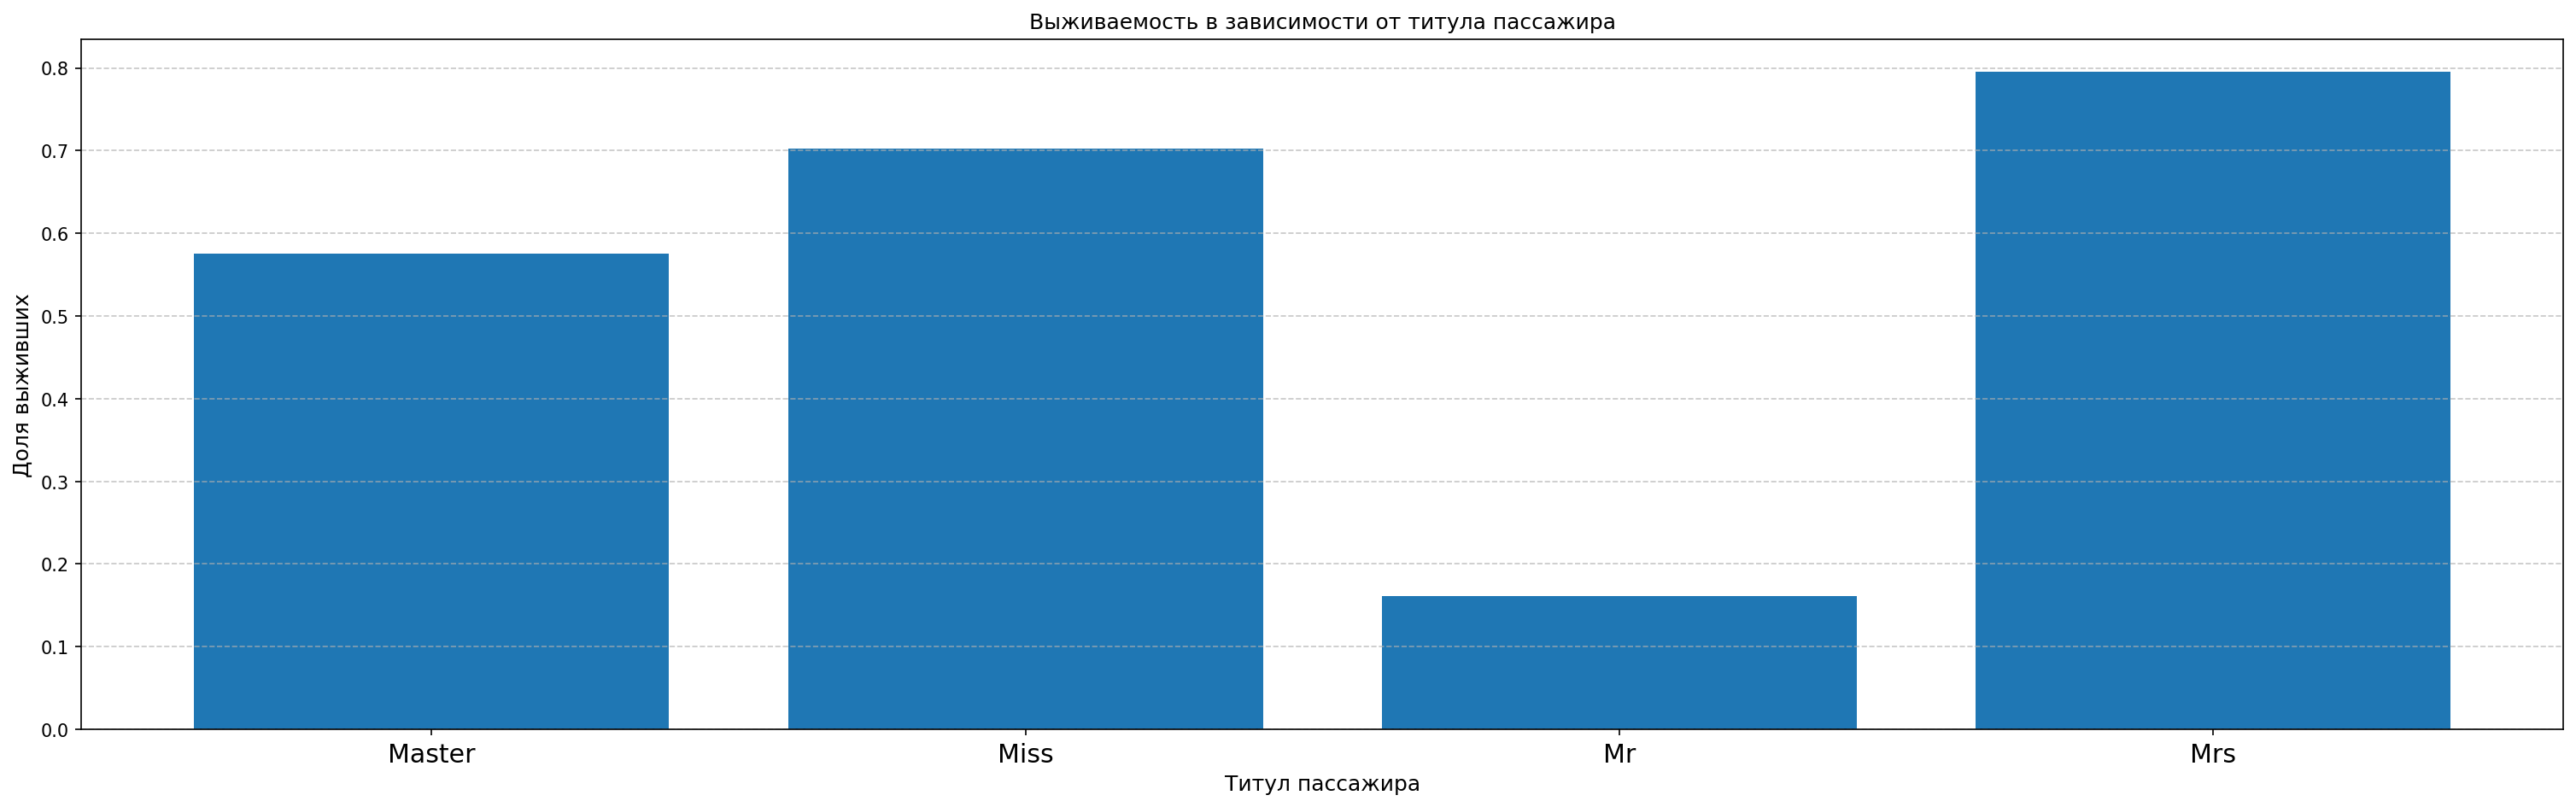

In [69]:
# Словарь с синонимами
titles = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Dr": "Mr",
    "Rev": "Mr",
    "Mlle": "Miss",
    "Mme": "Mrs",
    "Ms": "Miss",
    "Major": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Col": "Mr",
    "Capt": "Mr",
    "Don": "Mr",
    "Sir": "Mr",
    "Jonkheer": "Mr",
    "Dona": "Mrs"
}

# Заменяем титулы в Датасете на синонимичные
data['Title'] = data['Title'].map(titles)

# Расчёт доли выживших
title_survival = data.groupby('Title')['Survived'].mean().reset_index()

plt.bar(title_survival['Title'], title_survival['Survived'])
plt.xlabel('Титул пассажира')
plt.ylabel('Доля выживших')
plt.title('Выживаемость в зависимости от титула пассажира')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Теория о том, что в первую очередь спасали женщин (мисс и миссис) и детей (мастера) из предыдущего пункта подтверждается.

###Возраст пассажира

Посмотрим на то, как возраст пассажира влияет на его выживаемость.

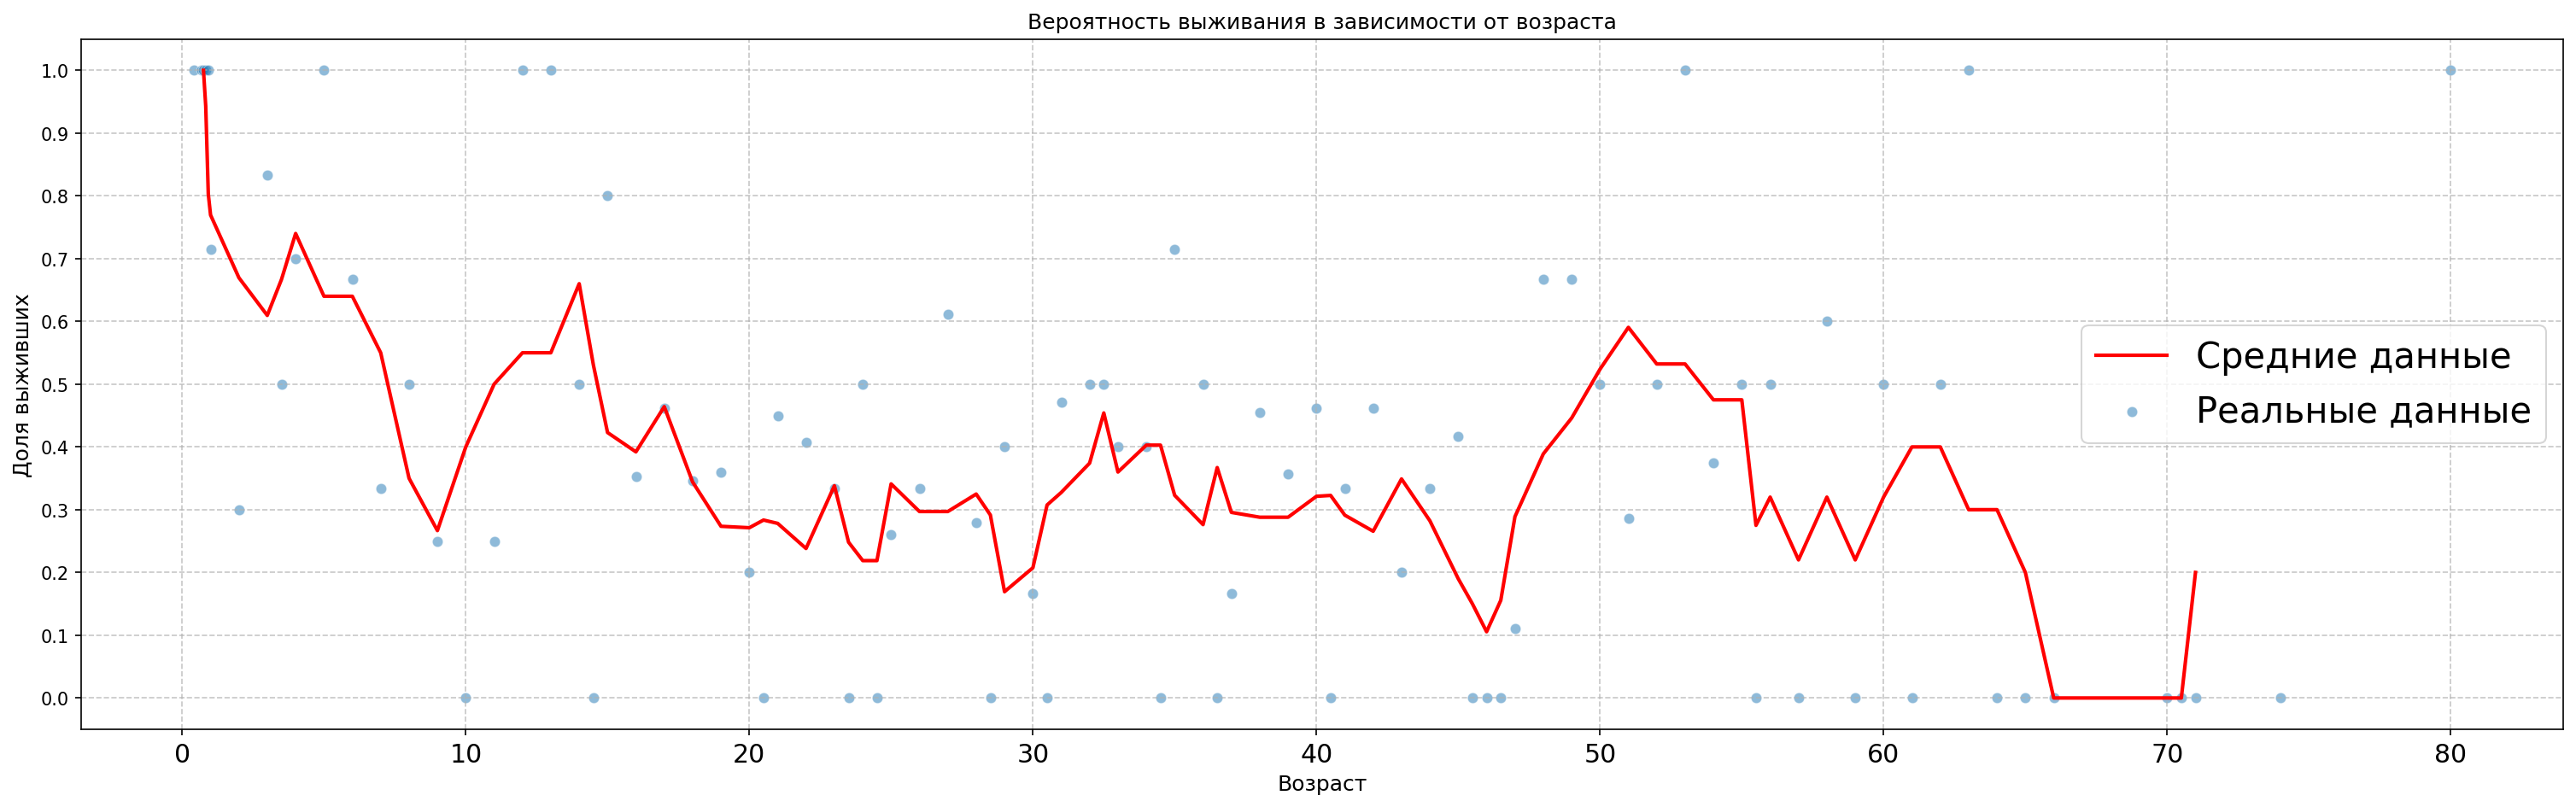

In [70]:
age_survival = data.groupby('Age')['Survived'].mean().reset_index() # Считаем вероятность выжить в среднем для каждого возраста

age_survival['Rolling_Mean'] = age_survival['Survived'].rolling(window=5, center=True).mean()
# Сглаживаем шумы и локальные выбросы
plt.plot(age_survival['Age'],
         age_survival['Rolling_Mean'],
         color='red',
         linewidth=2,
         label='Средние данные')
# Красная линия на графике показывает среднее значение между пятью ближайшими точками для избежания выбросов

# Настройки графика
sns.scatterplot(x='Age',
                y='Survived',
                data=age_survival,
                alpha=0.5,
                label='Реальные данные')
# Синие точки на графике показывают реальную долю выживших для данного возраста
plt.title('Вероятность выживания в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

В очередной раз видим более высокий уровень выживаемости среди детей относительно пассажиров всех возрастов, что в очередной раз доказывает нашу теорию. С увеличением возраста выживаемость пассажиров падает из-за ограниченной мобильности.

###**Класс пассажира**

Последний из, как мне кажется, значимых для обучения признаков - это класс каюты пассажира

In [71]:
#Создаем словарь с классами
class_names = {1: 'Первый класс', 2: 'Второй класс', 3: 'Третий класс'}
# Создаем новый столбец с текстовым названием классов вместо чисел
data['Class'] = data['Pclass'].map(class_names)

#Следующие две строчки помогают упорядочить классы по порядку
ordered_classes = ['Первый класс', 'Второй класс', 'Третий класс']
data['Class'] = pd.Categorical(data['Class'],
                               categories=ordered_classes,
                               ordered=True)

# Формируем таблицу с выжившими о погибшими для каждого класса
grouped = data.groupby(['Class', 'Survived']).size().unstack(fill_value=0)
grouped.columns = ['Погибли', 'Выжили']

grouped.head()

,Погибли,Выжили
Class,,
Первый класс,80,136
Второй класс,97,87
Третий класс,372,119


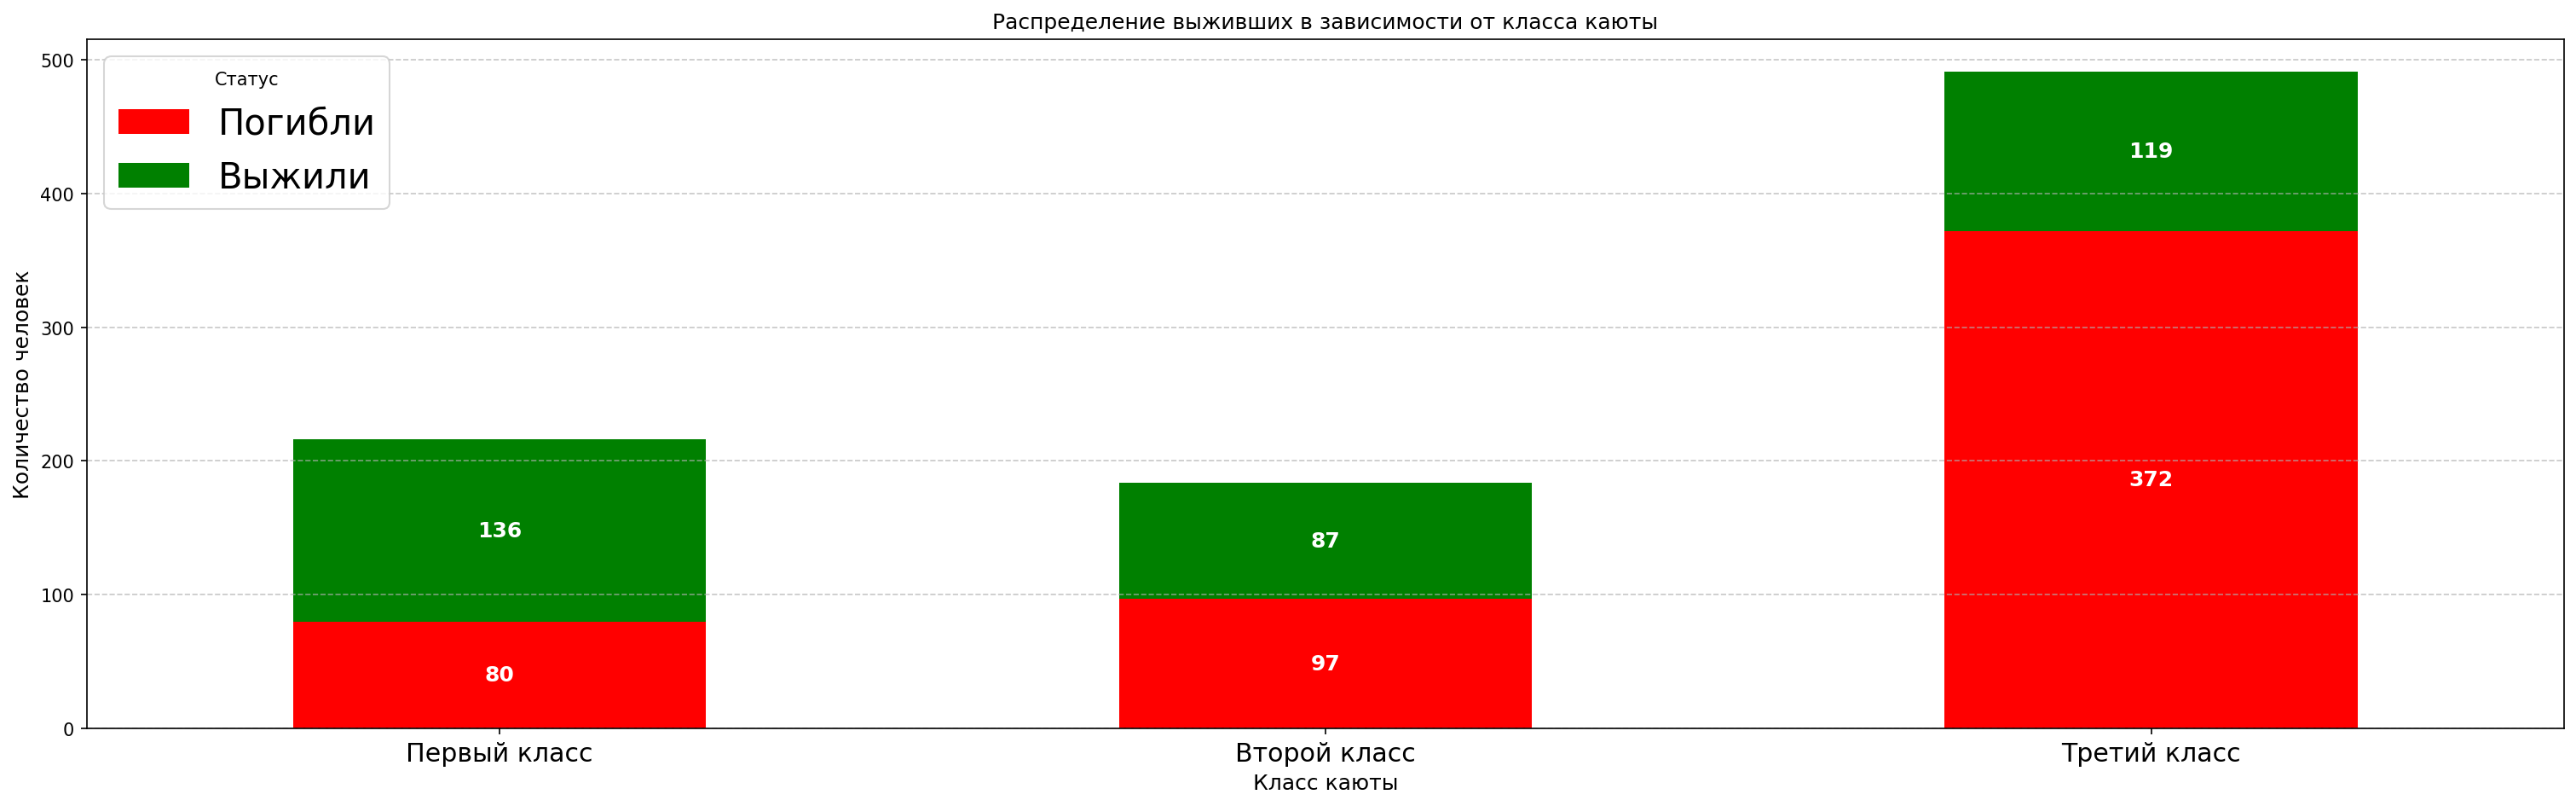

In [72]:
# Визуализация
ax = grouped.plot.bar(stacked=True, color=['r', 'g'])

# Добавляем подписи в центр каждого сегмента
for container in ax.containers:
    ax.bar_label(container,
                 label_type='center',
                 color='white',
                 fontsize=12,
                 weight='bold')

# Настройки графика
plt.title('Распределение выживших в зависимости от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество человек')
plt.xticks(rotation=0)
plt.legend(title='Статус')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В процентном соотношении для каждого класса:

In [73]:
# Считаем общее количество людей в каждом классе
total_by_class = grouped.sum(axis=1)

# Считаем проценты
survival_percent = (grouped['Выжили'] / total_by_class) * 100
death_percent = (grouped['Погибли'] / total_by_class) * 100

percent_table = pd.DataFrame({
    'Выжили (%)': survival_percent,
    'Погибли (%)': death_percent
})

percent_table.head()

,Выжили (%),Погибли (%)
Class,,
Первый класс,62.962963,37.037037
Второй класс,47.282609,52.717391
Третий класс,24.236253,75.763747


###Родственники пассажиров на борту

Теперь перейдем к пункту из признаков, которые, по мнению автора, не так сильно влияют на выживаемость, как предыдущие проанализированные (Возраст, титул..). В число таковых признаков будут входить: Родственники на борту, Номер кабины, Порт отправки и стоимость билета.

Сейчас будет рассмотрена корреляция между выживаемостью и наличием родственников на борту. Начнем.

Рассмотрим то, как каждый признак SibSp и Parch отдельно влияет на выживаемость, как они вместе влияют и то, как Поездка в Одиночку влияет. Для этого построим таблицу корреляций.

In [74]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Третий класс
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Первый класс
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Третий класс
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Первый класс
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Третий класс


Просто напоминание о том, как сейчас выглядит наш Датасет.

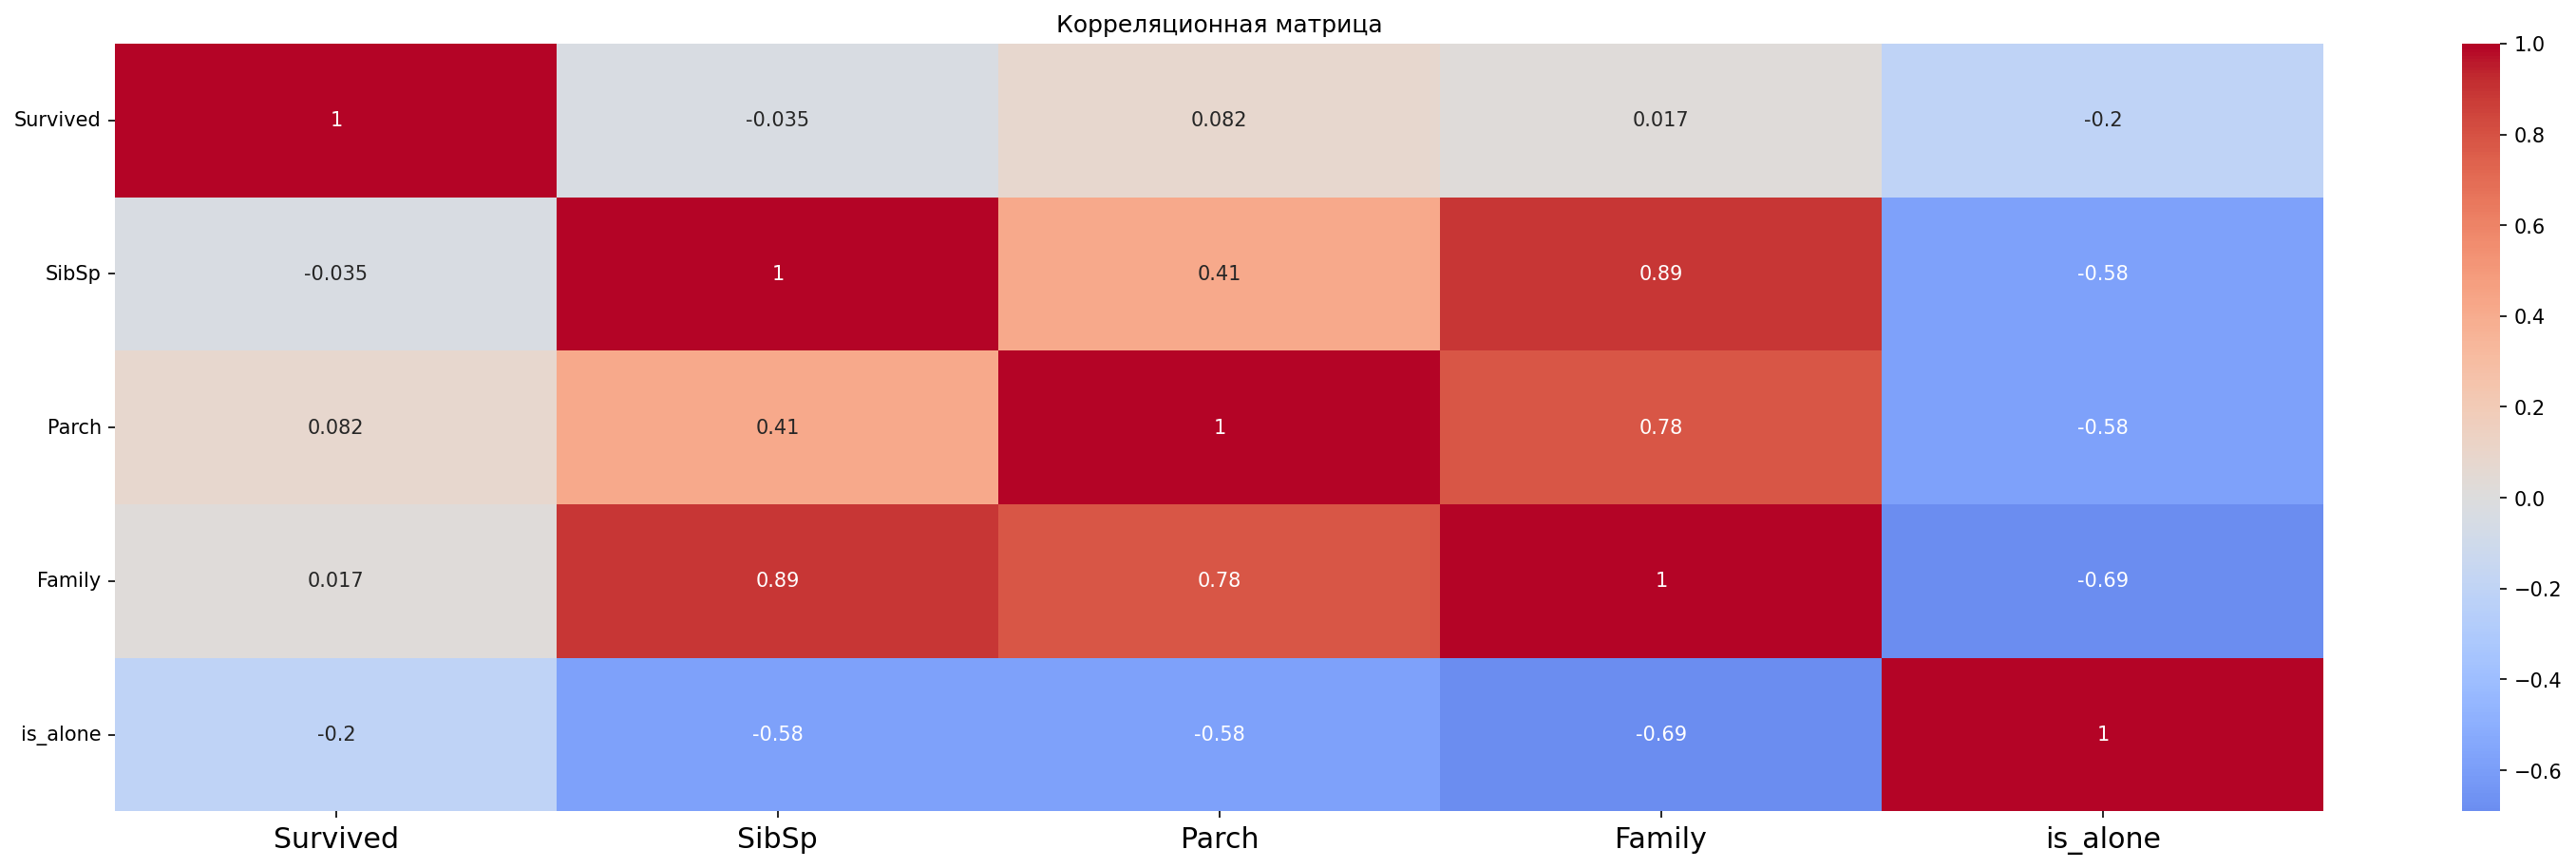

In [77]:
# Создание новых признаков
#Family - совокупность братьев/сестер и родителей/детей
data['Family'] = data['SibSp'] + data['Parch']
#Если пассажир едет в одиночку - 1, иначе 0
data['is_alone'] = (data['Family'] == 0).astype(int)

# Выбор интересующих колонок
cols = ['Survived', 'SibSp', 'Parch', 'Family', 'is_alone']

# Корреляционная матрица
correlation_matrix = data[cols].corr()
# Метод .corr() вычисляет коэф. корреляции Пирсона


# Визуализация
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

Если вы хотите изучить тему Коэффициентов корреляции Пирсона поблиэе, то можете изучить данную статью:
[Коэффициент корреляции Пирсона](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0)

>Чем ближе к 1, тем сильнее положительная связь между признаками
>
>Чем ближе к 0, тем сильнее отсутствии связи вовсе
>
>Чем блжие к -1, тем сильнее отрицательная связь между признаками

Из матрицы корреляций можно сделать выводы, что:


*   Отсутствие семьи на борту более негативно сказывалось на выживаемости, чем ее наличие (Хотя и тот, и другой признак имели достаточно слабую корреляцию к выживаемости)

Пояснение:
>Family - Survive 0.017 (Почти никак семья не влияла на выживаемость)
>
>is_alone - Survive -0.2 (Одиночество слабо влияло на выживаемость в отрицательную сторону)

Возможно, стоит рассмотреть влияение количества людей в семье на выживаемость, для этого построим гистограммы.

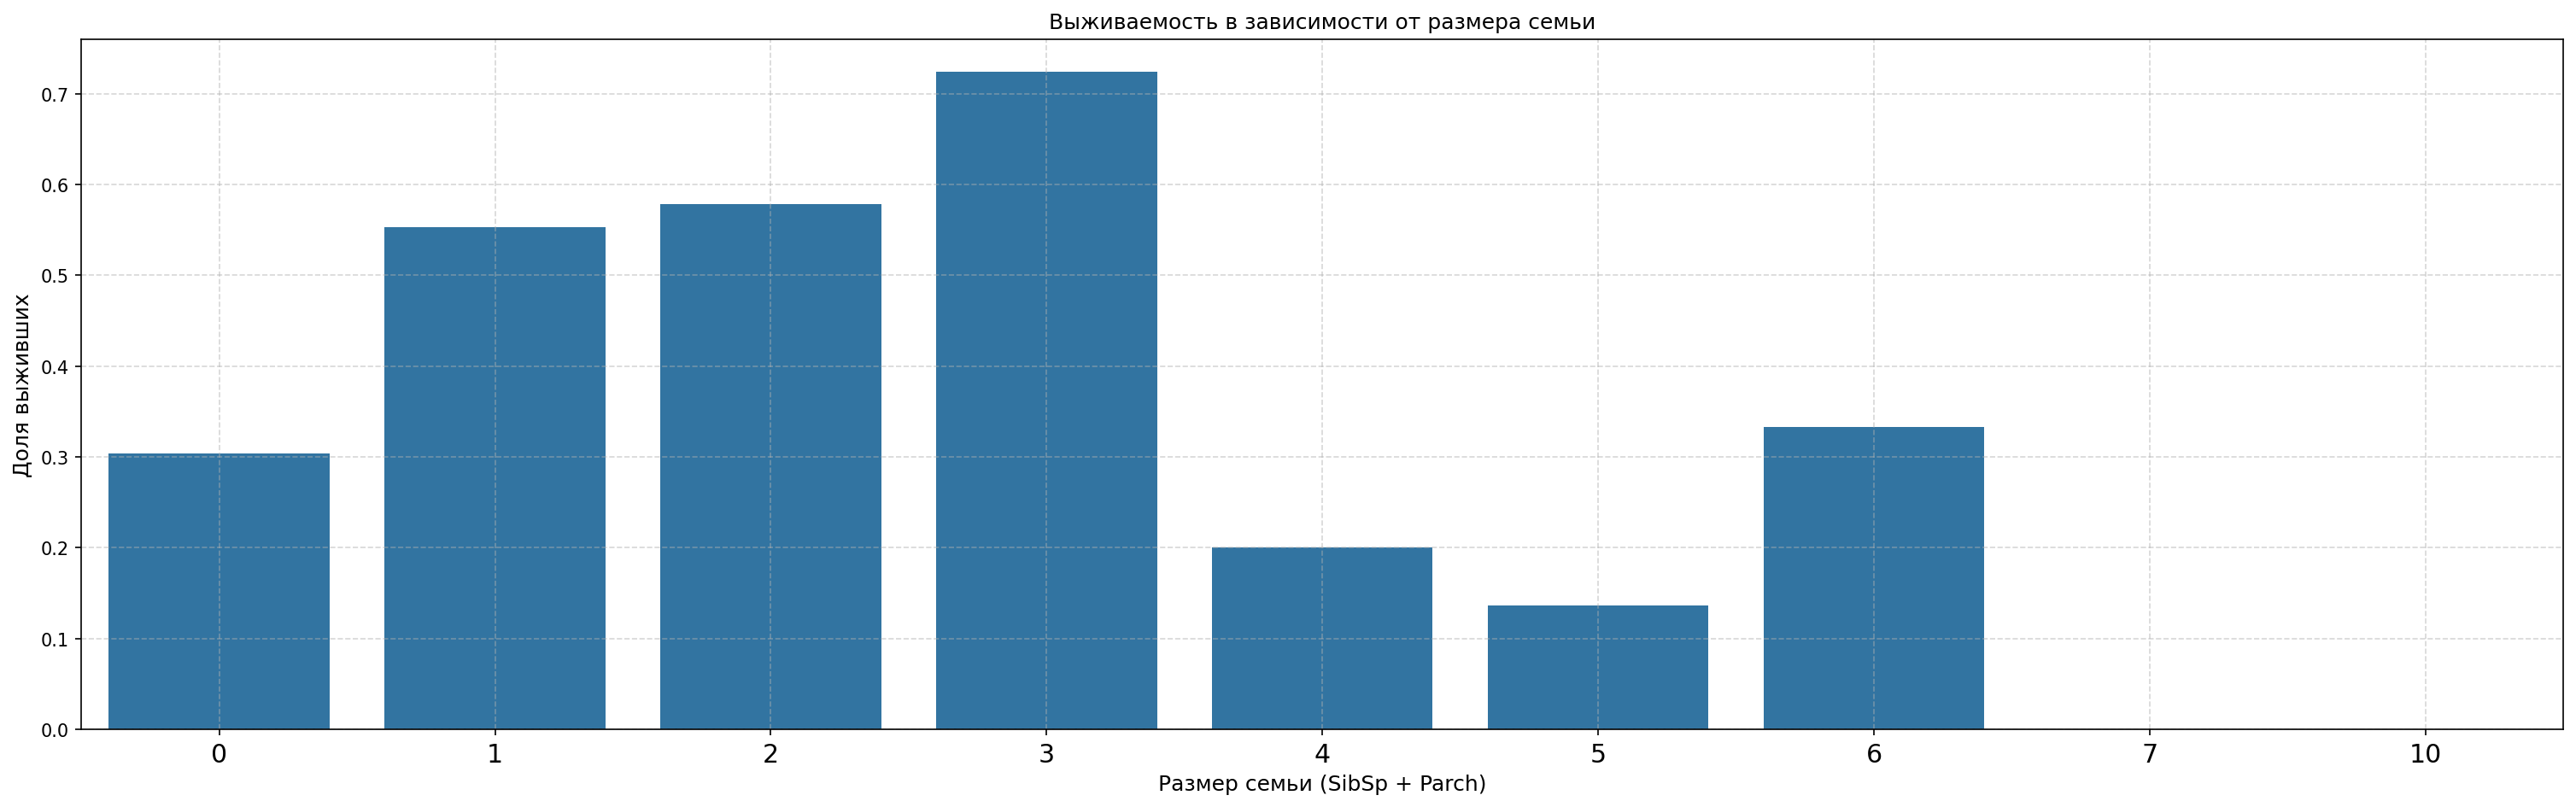

In [79]:
sns.barplot(x='Family', y='Survived', data=data, ci=None)
plt.title('Выживаемость в зависимости от размера семьи')
plt.xlabel('Размер семьи (SibSp + Parch)')
plt.ylabel('Доля выживших')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Как мы видим, лучшая выживаемость у тех пассажиров, кто путешествовал в компании с одним, двумя или даже тремя членами семьи. Одинокие люди имели более низкие шансы выжить, а наличие семьи в 4-6 человек уже создавало серьезные проблемы для выживания.